In [14]:
#import needed libraries

import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd

#import data
#3,4,5,6,10,11,12,13,17,s1,s2,s3,s5
files = ['Birds4', 'Birds5', 'Birds6', 'Birds10', 'Birds11', 'Birds12', 'Birds13', 'Birds17', 'S1a', 'S1b', 'S1c', 'S2', 'S3body', 'S3wing', 'S5body', 'S5wing']


(array([4.26666667, 4.23333333, 4.2       , 4.16666667, 4.13333333,
        4.1       , 4.06666667, 4.03333333, 4.        , 3.96666667,
        3.93333333]),
 array([-3.8322832 , -4.12006402, -4.42719152, -4.75404641, -5.10608904,
        -5.47073437, -5.85596598, -6.24872908, -6.65550184, -7.07027918,
        -7.49156223]),
 array([2.87141792, 2.99636449, 3.12263878, 3.256161  , 3.39838935,
        3.55147114, 3.70979941, 3.87552708, 4.05188758, 4.23190147,
        4.41313293]))

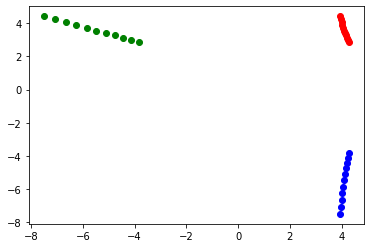

In [3]:
files = ['Birds3a', 'Birds4', 'Birds5', 'Birds6', 'Birds10', 'Birds11', 'Birds12', 'Birds13', 'Birds17', 'S1a', 'S1b', 'S1c', 'S2', 'S3body', 'S3wing', 'S5body', 'S5wing']
#ext = [b3, b4, b5, b6, b10, b11, b12, b13, b17, S1a, S1b, S1c, S2, S3b, S3w, S5b, S5w]

def birdsdata(filename, tf):
    b = np.loadtxt(filename, delimiter=",")
    t, x, y = b.T
    if tf == "t":
        plt.plot(t, x, 'ro', color = 'blue')
        plt.plot(t, y, 'ro', color = 'red')
        plt.plot(x, y, 'ro', color = 'green')
    return(t, x, y)
birdsdata('Birds3a', "t")

(array([0.4       , 0.40416667, 0.40833333, 0.4125    , 0.41666667,
        0.42083333, 0.425     , 0.42916667, 0.43333333, 0.4375    ,
        0.44166667, 0.44583333, 0.45      , 0.45416667, 0.45833333,
        0.4625    , 0.46666667, 0.47083333, 0.475     , 0.47916667,
        0.48333333, 0.4875    , 0.49166667, 0.49583333, 0.5       ,
        0.50416667, 0.50833333, 0.5125    , 0.51666667, 0.52083333,
        0.525     , 0.52916667, 0.53333333, 0.5375    , 0.54166667,
        0.54583333, 0.55      , 0.55416667, 0.55833333, 0.5625    ,
        0.56666667, 0.57083333, 0.575     , 0.57916667, 0.58333333,
        0.5875    , 0.59166667, 0.59583333, 0.6       , 0.60416667,
        0.60833333, 0.6125    , 0.61666667, 0.62083333, 0.625     ,
        0.62916667, 0.63333333, 0.6375    , 0.64166667, 0.64583333,
        0.65      , 0.65416667, 0.65833333, 0.6625    , 0.66666667,
        0.67083333, 0.675     , 0.67916667, 0.68333333, 0.6875    ,
        0.69166667, 0.69583333, 0.7       , 0.70

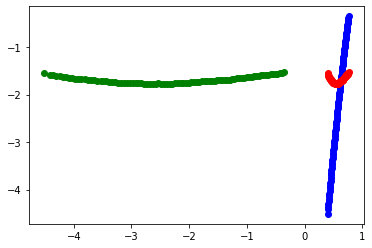

In [10]:
birdsdata("S5body",'t')

(array([0.4       , 0.40416667, 0.40833333, 0.4125    , 0.41666667,
        0.42083333, 0.425     , 0.42916667, 0.43333333, 0.4375    ,
        0.44166667, 0.44583333, 0.45      , 0.45416667, 0.45833333,
        0.4625    , 0.46666667, 0.47083333, 0.475     , 0.47916667,
        0.48333333, 0.4875    , 0.49166667, 0.49583333, 0.5       ,
        0.50416667, 0.50833333, 0.5125    , 0.51666667, 0.52083333,
        0.525     , 0.52916667, 0.53333333, 0.5375    , 0.54166667,
        0.54583333, 0.55      , 0.55416667, 0.55833333, 0.5625    ,
        0.56666667, 0.57083333, 0.575     , 0.57916667, 0.58333333,
        0.5875    , 0.59166667, 0.59583333, 0.6       , 0.60416667,
        0.60833333, 0.6125    , 0.61666667, 0.62083333, 0.625     ,
        0.62916667, 0.63333333, 0.6375    , 0.64166667, 0.64583333,
        0.65      , 0.65416667, 0.65833333, 0.6625    , 0.66666667,
        0.67083333, 0.675     , 0.67916667, 0.68333333, 0.6875    ,
        0.69166667, 0.69583333, 0.7       , 0.70

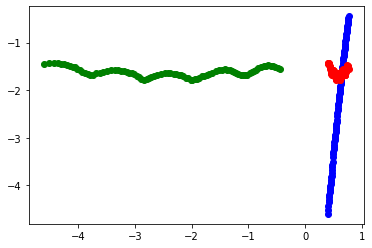

In [11]:
birdsdata('S5wing','t')

C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


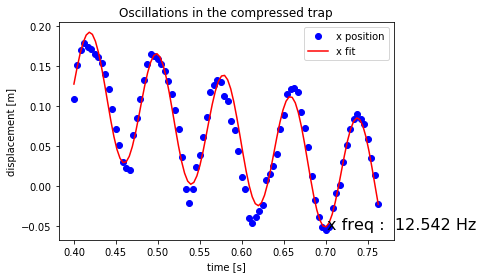

[ 0.07485235  0.07972998 -1.62751667 -0.3356434   0.25793846]
12.542332967854879


In [46]:
s5bt, s5bx, s5by = birdsdata("S5body", "f")
s5wt, s5wx, s5wy = birdsdata("S5wing", 'f')
out = []

for i in range(len(s5bt)):
    diff = s5wy[i]-s5by[i]
    out.append(diff)

fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x + p[4] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [.5, (1/12), 1.5, 2, .1] # initial guess
p1, success = optimize.leastsq(errfunc, p0[:], args=(s5bt, out))


time = np.linspace(s5bt.min(), s5bt.max(), 100)
plt.plot(s5bt, out, "bo") # Plot of the data and the fit
plt.plot(time, fitfunc(p1, time), "r-")

# Legend the plot
plt.title("")
plt.xlabel("time [s]")
plt.ylabel("displacement [m]")
plt.legend(('y position', 'y fit'))

ax = plt.axes()

plt.text(0.8, 0.07,
         'x freq :  %.3f Hz' % (1/p1[1]),
         fontsize=16,
         horizontalalignment='left',
         verticalalignment='center',
         transform=ax.transAxes)


plt.show()
print(p1)
print(1/p1[1])

C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


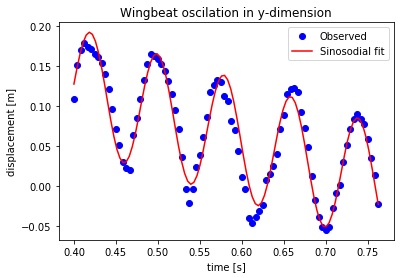

[ 0.07485235  0.07972999 -7.9107011  -0.33564346  0.25793849]
12.542332326745907


In [4]:
def sinfitwings(body, wing):
    s5bt, s5bx, s5by = birdsdata(body, 'f')
    s5wt, s5wx, s5wy = birdsdata(wing, 'f')
    out = []
    
    for i in range(len(s5bt)):
        diff = s5wy[i]-s5by[i]
        out.append(diff)

    fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x + p[4] # Target function
    errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
    p0 = [.5, (1/10), 1.5, 2, .1] # initial guess
    p1, success = optimize.leastsq(errfunc, p0[:], args=(s5bt, out))


    time = np.linspace(s5bt.min(), s5bt.max(), 100)
    plt.plot(s5bt, out, "bo") # Plot of the data and the fit
    plt.plot(time, fitfunc(p1, time), "r-")

    # Legend the plot
    plt.title("Wingbeat oscilation in y-dimension")
    plt.xlabel("time [s]")
    plt.ylabel("displacement [m]")
    plt.legend(('Observed', 'Sinosodial fit'))

    ax = plt.axes()


    plt.show()
    print(p1)
    print(1/p1[1])
    
sinfitwings("S5Body", "S5wing")

C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


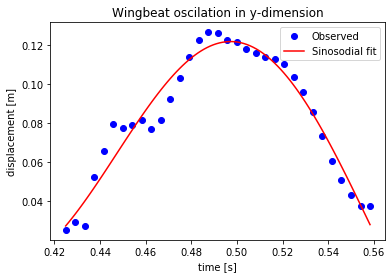

[ 0.07415758  0.22123625 17.14387648 -0.31528646  0.20524697]
4.5200549251773126


In [5]:
sinfitwings("S3Body", "S3Wing")

C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


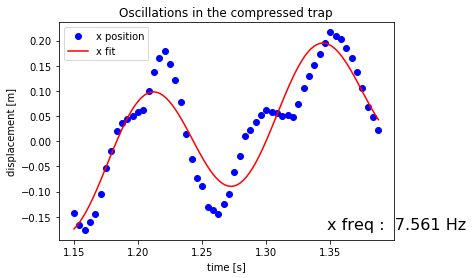

[-0.11719574  0.13225114 21.09247733  0.73328011 -0.90664557]
7.561371217441116


In [84]:
sinfitwings("S1a", "S1b")

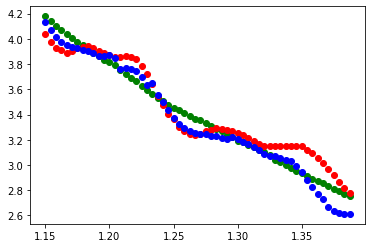

In [132]:
t, s5bx, ay = birdsdata("S1a", 'f')
t, s5wx, by = birdsdata("S1b", 'f')
t, s5wx, cy = birdsdata("S1c", 'f')
plt.plot(t, ay, "go")
plt.plot(t, by, "ro")
plt.plot(t, cy, "bo")

C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


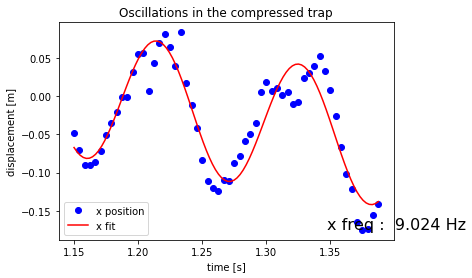

[-0.0842016   0.11081736  9.66369999 -0.27224009  0.31843716]
9.023856560173062


In [82]:
sinfitwings("S1a", "S1c")

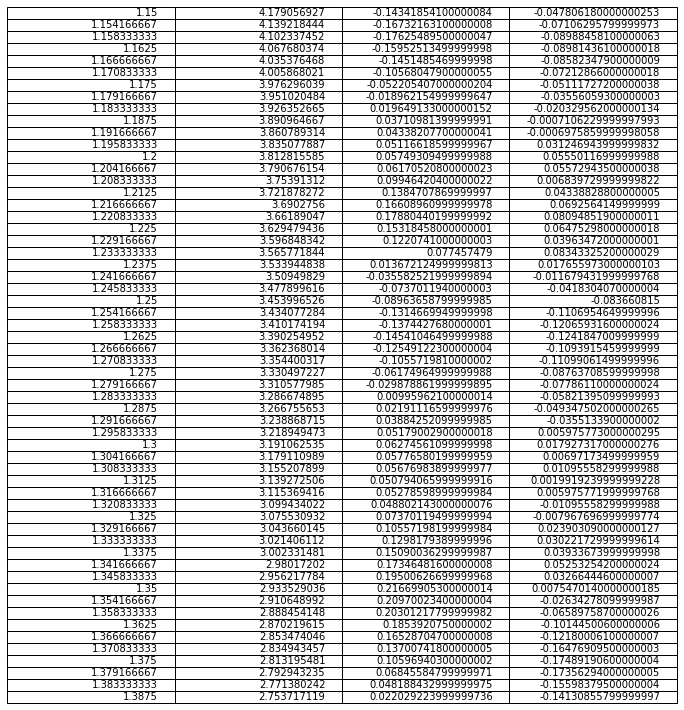

In [158]:
#define figure and axes
fig, ax = plt.subplots()

t, s5bx, ay = birdsdata("S1a", 'f')
t, s5wx, by = birdsdata("S1b", 'f')
t, s5wx, cy = birdsdata("S1c", 'f')

outer = []
for i in range(len(t)):
    inner = [t[i], ay[i], by[i]-ay[i], cy[i]-ay[i]]
    outer.append(inner)

#create table
table = ax.table(cellText=outer, loc='center')

#modify table
table.set_fontsize(14)
table.scale(2,1)
ax.axis('off')

#display table
plt.show()


In [190]:
output = []
nan = []
end = 0
for i in range(len(outer)):
    if 1.185 < outer[i][0] < 1.2 :
        nan.append(outer[i][2])
    elif 1.29 < outer[i][0] < 1.325 :
        nan.append(outer[i][2])
    else:
        output.append(outer[i])
lorn = len(nan)
print(nan)

[0.03710981399999991, 0.04338207700000041, 0.05116618599999967, 0.03884252099999985, 0.05179002900000018, 0.06274561099999998, 0.05776580199999959, 0.05676983899999977, 0.050794065999999916, 0.05278598999999984, 0.048802143000000076]


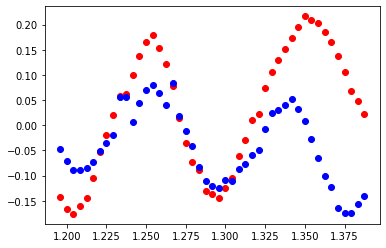

In [191]:
to = []
ayo = []
byo = []
cyo = []

for i in range(len(output)):
    to.append(output[i][0])
    ayo.append(output[i][1])
    byo.append(output[i][2])
    cyo.append(output[i][3])
plt.plot(t[lorn:], byo, "ro")
plt.plot(t[lorn:], cyo, "bo")

C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


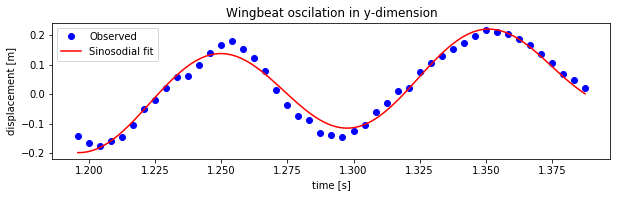

[-0.14653202  0.10124777 26.20087274  0.81859241 -1.03189722]
9.876761227640854


In [213]:
def sinfitwings(s5bt, out):
    fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x + p[4] # Target function
    errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
    p0 = [.5, (1/13), 1.5, 2, -.1] # initial guess
    p1, success = optimize.leastsq(errfunc, p0[:], args=(s5bt, out))
    
    plt.figure(figsize=(10,2.5))

    time = np.linspace(s5bt.min(), s5bt.max(), 100)
    plt.plot(s5bt, out, "bo") # Plot of the data and the fit
    plt.plot(time, fitfunc(p1, time), "r-")

    # Legend the plot
    plt.title("Wingbeat oscilation in y-dimension")
    plt.xlabel("time [s]")
    plt.ylabel("displacement [m]")
    plt.legend(('Observed', 'Sinosodial fit'))

    ax = plt.axes()

    plt.show()
    print(p1)
    print(1/p1[1])
    
sinfitwings(t[lorn:], byo)

C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


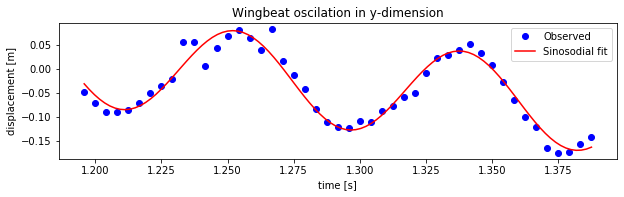

[-0.09301667  0.08557523 11.67957965 -0.49712515  0.60976331]
11.685624388818042


In [214]:
sinfitwings(t[lorn:], cyo)

C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


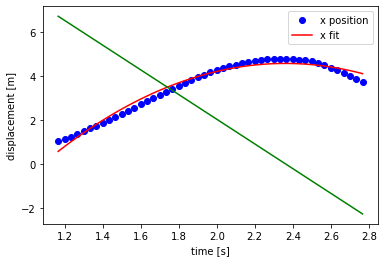

In [248]:
t3, x3, y3 = birdsdata('Birds4', 'f')
#plt.plot(t3, y3, "go")


fitfunc = lambda p, x: (p[0]*(x**2))+p[1]*x+p[2] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [.5, 1, 1.5,] # initial guess
p1, success = optimize.leastsq(errfunc, p0[:], args=(t3, x3))
    

time = np.linspace(t3.min(), t3.max(), 100)
plt.plot(t3, x3, "bo") # Plot of the data and the fit
plt.plot(time, fitfunc(p1, time), "r-")

# Legend the plot
plt.title("")
plt.xlabel("time [s]")
plt.ylabel("displacement [m]")
plt.legend(('x position', 'x fit'))

# defining polynomial function
var = np.poly1d(p1)

# calculating the derivative
derivativex = var.deriv()
plt.plot(time, derivativex(time), "g-")

ax = plt.axes()

plt.show()

C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


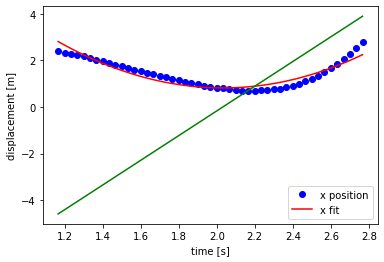

In [249]:
t3, x3, y3 = birdsdata('Birds4', 'f')


fitfunc = lambda p, x: (p[0]*(x**2))+p[1]*x+p[2] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [.5, 1, 1.5,] # initial guess
p1, success = optimize.leastsq(errfunc, p0[:], args=(t3, y3))
    

time = np.linspace(t3.min(), t3.max(), 100)
plt.plot(t3, y3, "bo") # Plot of the data and the fit
plt.plot(time, fitfunc(p1, time), "r-")

# Legend the plot
plt.title("")
plt.xlabel("time [s]")
plt.ylabel("displacement [m]")
plt.legend(('x position', 'x fit'))

# defining polynomial function
var = np.poly1d(p1)

# calculating the derivative
derivativey = var.deriv()
plt.plot(time, derivative(time), "g-")

ax = plt.axes()

plt.show()

In [291]:
def hi(t):
    return(np.sqrt((derivativex(t)**2) + (derivativey(t)**2)))
def hey(t):
    return(np.sqrt((accelx(t)**2) + (accely(t)**2)))

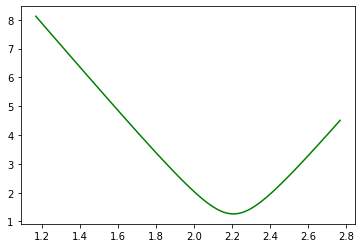

In [292]:
plt.plot(time, hi(time), "g-")

Birds4 



C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


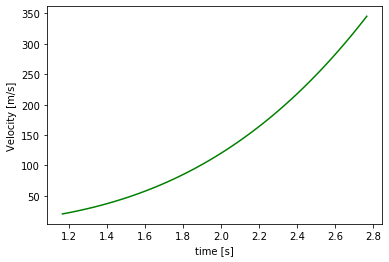

Birds5 



C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


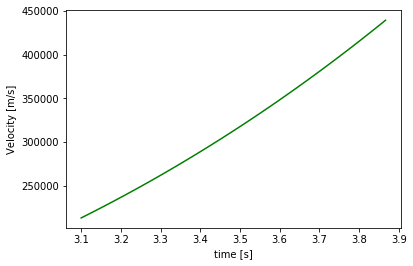

Birds6 



C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


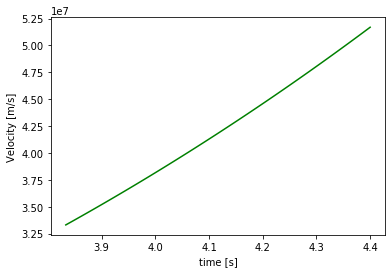

Birds10 



C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


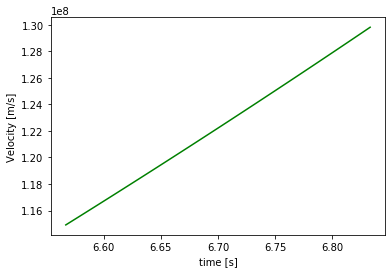

Birds11 



C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


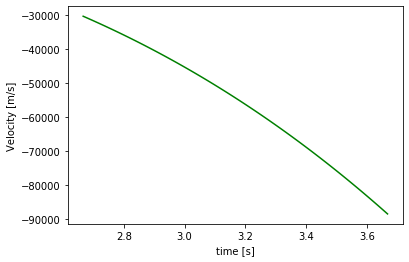

Birds12 



C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


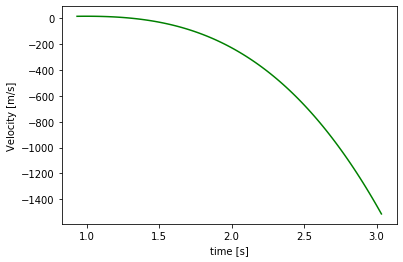

Birds13 



C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


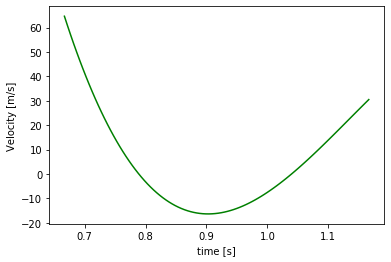

Birds17 



C:\Users\rainm\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


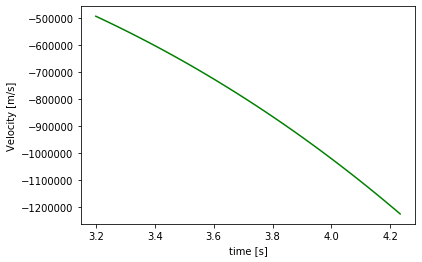

In [25]:
def trueVel(filename):
    t3, x3, y3 = birdsdata(filename, 'f')
    #plt.plot(t3, y3, "go")


    fitfunc = lambda p, x: (p[4]*(x**4)) + (p[3]*(x**3)) + (p[2]*(x**2))+p[1]*x + p[0] # Target function
    errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
    p0 = [0, 1, 1.5, 1, 1] # initial guess
    p1, success = optimize.leastsq(errfunc, p0[:], args=(t3, x3))
    

    time = np.linspace(t3.min(), t3.max(), 100)
    #plt.plot(t3, x3, "ro") # Plot of the data and the fit
    #plt.plot(time, fitfunc(p1, time), "r-")

    # defining polynomial function
    var = np.poly1d(p1)

    # calculating the derivative
    derivativex = var.deriv()
    accelx = derivativex.deriv()
    
    p1, success = optimize.leastsq(errfunc, p0[:], args=(t3, y3))
    
    time = np.linspace(t3.min(), t3.max(), 100)
    #plt.plot(t3, y3, "bo") # Plot of the data and the fit
    #plt.plot(time, fitfunc(p1, time), "b-")

    # Legend the plot
    plt.title("")
    plt.xlabel("time [s]")
    plt.ylabel("Velocity [m/s]")

    # defining polynomial function
    var = np.poly1d(p1)

    # calculating the derivative
    derivativey = var.deriv()
    accely = derivativey.deriv()

    #plt.plot(time, hi(time), "g-")
    print(filename, '\n')
    trueaccel = ((accelx**2)+(accely**2))
    #plt.plot(time, np.sqrt(trueaccel(time)), "p-")
    
    ax = plt.axes()

    plt.show()
for i in range(8):
    trueVel(files[i])

Birds4


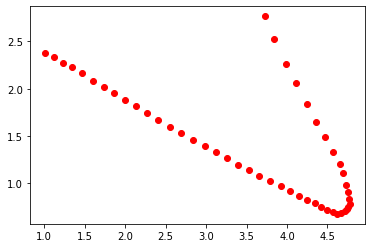

Birds5


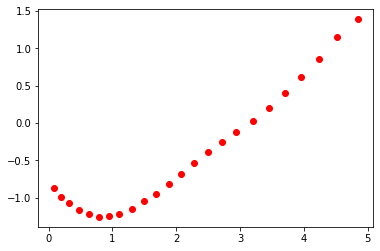

Birds6


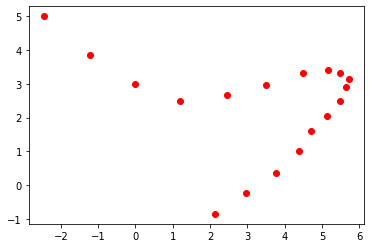

Birds10


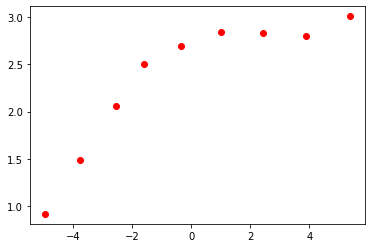

Birds11


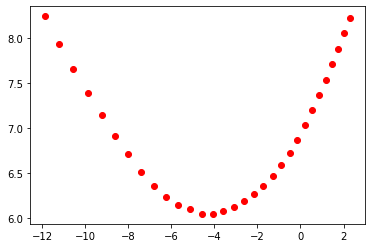

Birds12


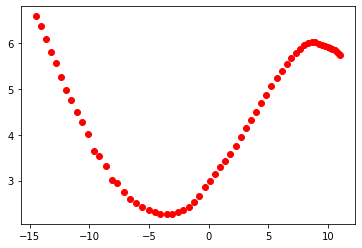

Birds13


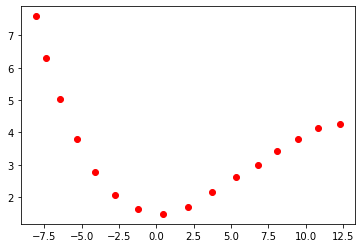

Birds17


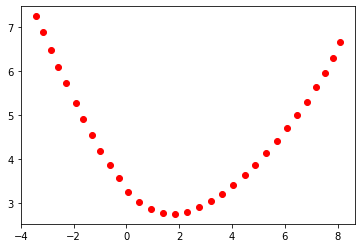

In [15]:
def tracks(f):    
    t, x, y = birdsdata(f, 'f')
    out = []
    print(f)
    plt.plot(x, y, "ro")
    plt.show()
for i in range(8):
    tracks(files[i])

Birds4


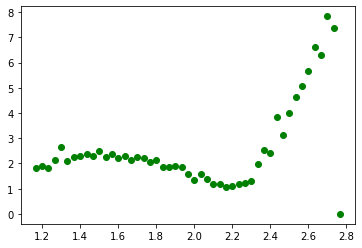

Birds5


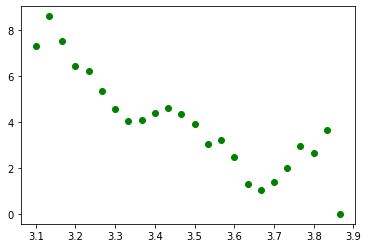

Birds6


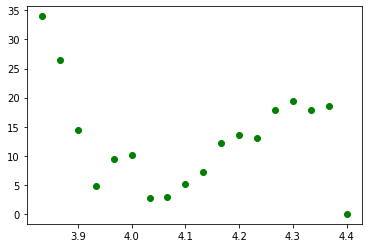

Birds10


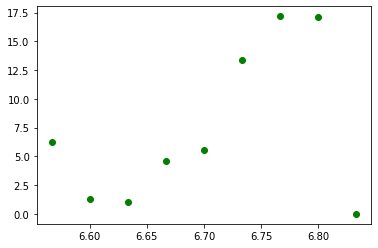

Birds11


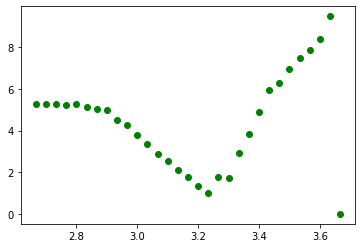

Birds12


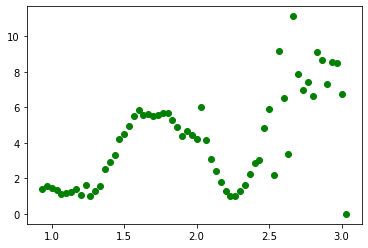

Birds13


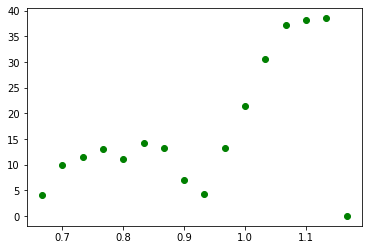

Birds17


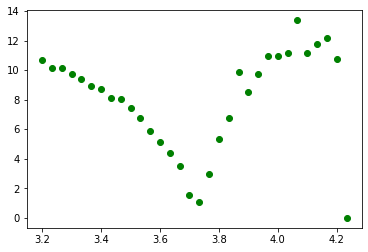

In [49]:
def tracks(f, tof):    
    t, x, y = birdsdata(f, 'f')
    outs = []
    outh = []
    test = []
    vels = []
    for i in range(len(t)-1):
        sink = (y[i+1]-y[i])/(t[i+1]-t[i])
        outs.append(sink)
    for i in range(len(t)-1):
        horiz = (x[i+1]-x[i])/(x[i+1]-x[i])
        outh.append(horiz)
    outs.append(0)
    outh.append(0)
    for i in range(len(t)):
        vel = np.sqrt((outs[i]**2)+(outh[i]**2))
        vels.append(vel)
    print(f)
    #plt.plot(t, outs, "ro")
    #plt.plot(t, outh, "bo")
    plt.plot(t, vels, "go")
    #plt.plot(t, y, "ro")
    plt.show()
for i in range(8):
    tracks(files[i], 'f')

Birds13


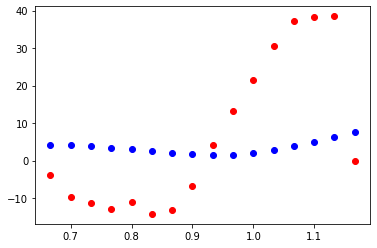

[[8.40316423, 0.03333333329999999], [7.945404311, 0.03333333329999999], [7.237298765, 0.03333333340000011], [6.4223410219999995, 0.03333333329999999], [5.618440533, 0.03333333329999999], [4.774018569000001, 0.0333333334], [3.858262175, 0.03333333329999999], [3.187970865, 0.03333333329999999], [3.098053738, 0.0333333334], [3.678427921, 0.03333333329999999], [4.835757567, 0.033333333000000076], [6.568705832, 0.03333333399999994], [8.828227011, 0.033333333000000076], [11.345906566, 0.033333332999999854], [13.904457543, 0.03333333400000016]]
Birds11


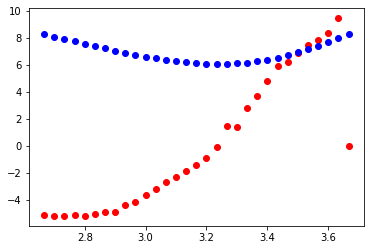

[[16.289471196, 0.0333333330000003], [15.944902683999999, 0.033333332999999854], [15.599478218, 0.03333333399999994], [15.255424122, 0.033333332999999854], [14.910770055, 0.0333333330000003], [14.569419989, 0.03333333399999994], [14.237390861000002, 0.033333332999999854], [13.909903011, 0.0333333330000003], [13.599504524, 0.03333333399999994], [13.314419973, 0.033333332999999854], [13.053888490999999, 0.033333332999999854], [12.824024674, 0.03333333399999994], [12.626614382, 0.0333333330000003], [12.458363419, 0.033333332999999854], [12.318305544, 0.03333333399999994], [12.208537419999999, 0.0333333330000003], [12.130292986, 0.033333332999999854], [12.096145719999999, 0.03333333399999994], [12.141730983999999, 0.033333332999999854], [12.237697869, 0.0333333330000003], [12.376122139, 0.03333333399999994], [12.590980943, 0.033333332999999854], [12.873523242000001, 0.0333333330000003], [13.229242883000001, 0.03333333399999994], [13.631207619000001, 0.033333332999999854], [14.0662554210000

In [42]:
tracks('Birds13', 't')
tracks('Birds11', 't')

In [41]:
(7.593910087-6.310547456)/0.033333

38.501263942639426